In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import generate_data, lstm_model

In [2]:
LOG_DIR = './ops_logs/sin'
TIMESTEPS = 3
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:
regressor = learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),
                            model_dir=LOG_DIR)

In [4]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)

# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
# print(X['train'])
# print(y['train'])

regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Estimator(params=None)

In [5]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


MSE: 0.000138


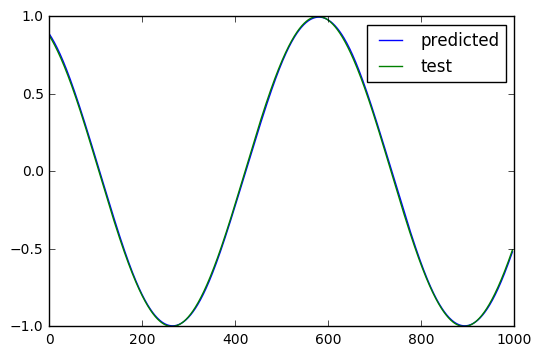

In [6]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])